<h2>Cepstrum</h2>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.signal import get_window
from scipy.io import wavfile
import IPython

In [2]:
fs, x = wavfile.read("test.wav")
x = x / np.max(abs(x))

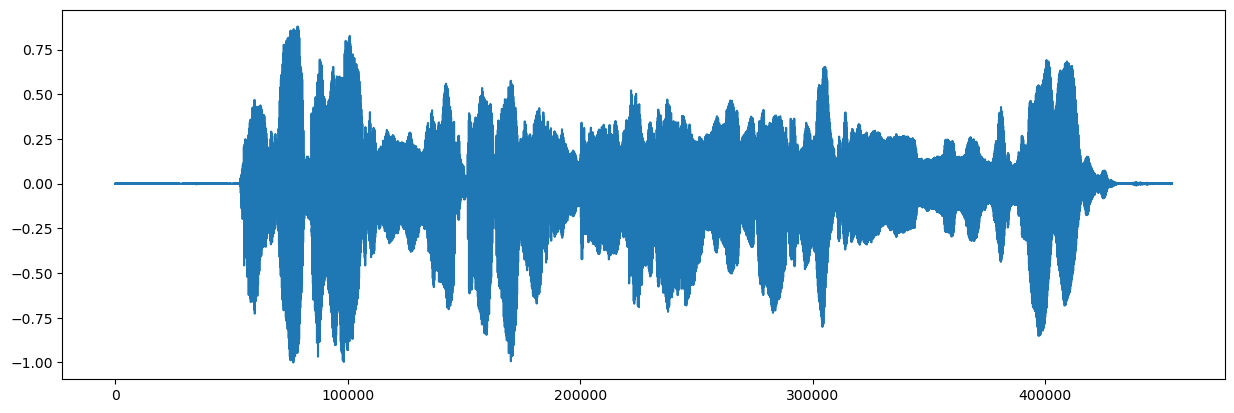

In [3]:
plt.figure().set_figwidth(15)
plt.plot(x)
IPython.display.Audio(x, rate=fs)

In [44]:
M=8191
N=8192
H=256

hM1 = int(math.floor((M + 1) / 2))
hM2 = int(math.floor(M / 2))
eps = np.finfo(float).eps

f = int(2000 * N / fs)

In [6]:
w  = get_window('blackmanharris', M)
w = w / sum(w)

In [64]:
def computeCepstrum(x):
    cepstrum = []

    l = 0
    while l < len(x) - M:
        y = x[l: l + M] * w

        fftBuffer = np.zeros(N)
        fftBuffer[: hM1] = y[hM2:] 
        fftBuffer[N - hM2:] = y[: hM2]

        X = fft(fftBuffer)
        absX = abs(X)
        absX[absX < np.finfo(float).eps] = np.finfo(float).eps
        mX = 20 * np.log10(absX)
        C = ifft(mX[:int(N / 2)])
        cepstrum.append(abs(C)[20:f])

        l += H
    
    return cepstrum

In [65]:
cepstrum = computeCepstrum(x)

In [66]:
t = np.arange(len(cepstrum)) * H / fs
fqs = np.arange(20, f) * fs / N

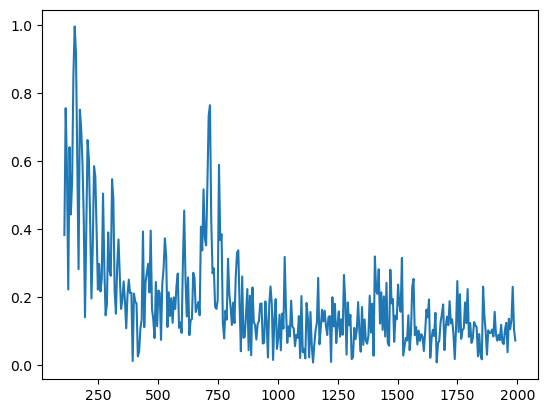

In [67]:
plt.plot(fqs, cepstrum[250])

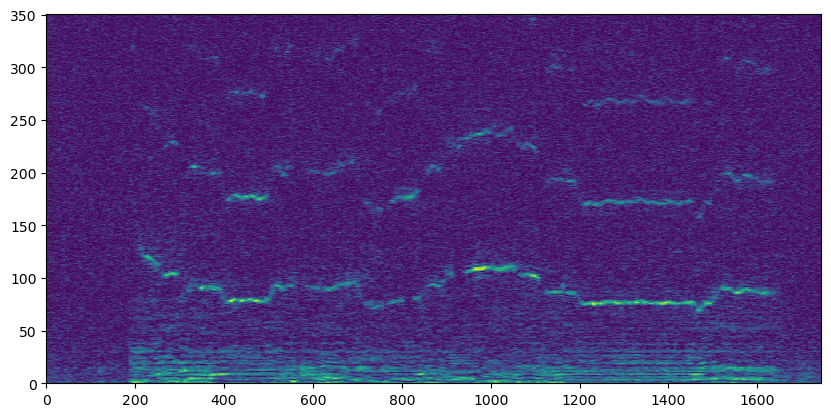

In [68]:
cepstrum = np.array(cepstrum)
plt.figure().set_figwidth(10)
plt.pcolormesh(cepstrum.T)